<a href="https://colab.research.google.com/github/zzeeddd95/capstone-project/blob/master/LSTMAmzn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#import libraries

import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.layers import Dropout
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Get Amazon stock
amznstock = web.DataReader('AMZN', data_source='yahoo', start='2010-05-27', end='2020-05-27')
amznstock

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-05-27,126.849998,120.599998,124.980003,126.699997,4747700,126.699997
2010-05-28,127.599998,124.010002,126.070000,125.459999,3954800,125.459999
2010-06-01,126.570000,123.019997,124.970001,123.239998,3659500,123.239998
2010-06-02,126.430000,121.650002,124.019997,126.309998,4764700,126.309998
2010-06-03,129.149994,124.849998,126.250000,128.759995,5276900,128.759995
...,...,...,...,...,...,...
2020-05-20,2500.010010,2467.270020,2477.870117,2497.939941,3998100,2497.939941
2020-05-21,2525.449951,2442.540039,2500.000000,2446.739990,5114400,2446.739990
2020-05-22,2469.850098,2430.129883,2455.010010,2436.879883,2867100,2436.879883


In [ ]:
#Get dataset information
amznstock.shape

(2517, 6)

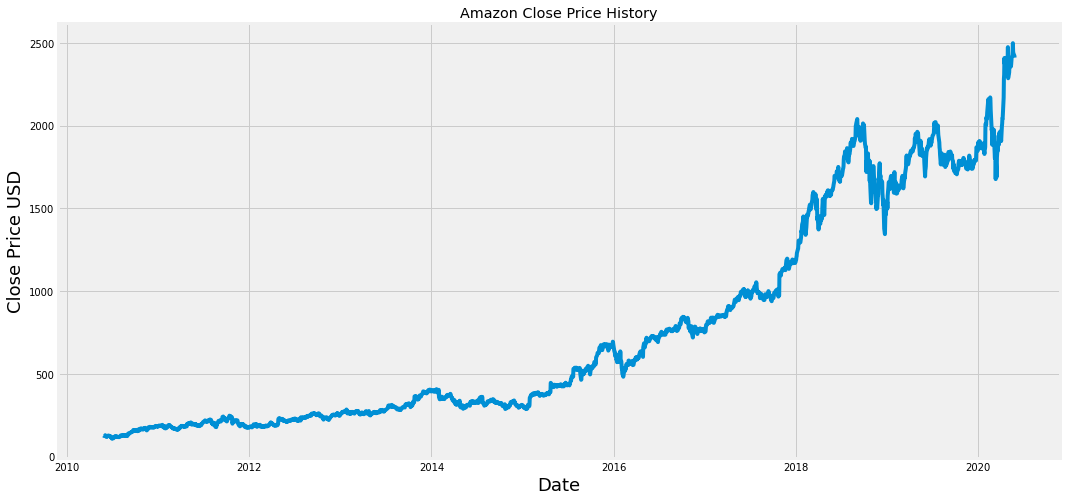

In [ ]:
#visualize closing amzn price
plt.figure(figsize=(16,8))
plt.title('Amazon Close Price History')
plt.plot(amznstock['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.show()

In [ ]:
#extract closing price and position into new datafram
amznclose = amznstock.filter(['Close'])
#convert dataframe to numpy array
amzndata = amznclose.values
#obtain row number to train model
training_amzn_data = math.ceil(len(amzndata)*.8)
training_amzn_data

2014

In [ ]:
#scaling data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_amzn_data = scaler.fit_transform(amzndata)
scaled_amzn_data

array([[0.00757116],
       [0.00705219],
       [0.00612305],
       ...,
       [0.97444469],
       [0.96815851],
       [0.96335791]])

In [ ]:
#create the training dataset
#create the scaled training dataset

train_amzn_data = scaled_amzn_data[0:training_amzn_data,:]
#split the data omtp x_train and y_train datasets

x_train_amzn = []
y_train_amzn = []

for i in range(360,len(train_amzn_data)):
  x_train_amzn.append(train_amzn_data[i-360:i,0])
  y_train_amzn.append(train_amzn_data[i,0])
  if i<= 360:
    print(x_train_amzn)
    print(y_train_amzn)
    print()

[array([0.00757116, 0.00705219, 0.00612305, 0.00740793, 0.00843332,
       0.00592635, 0.00560827, 0.00428153, 0.00389231, 0.0061105 ,
       0.00603516, 0.00636999, 0.00762975, 0.00765487, 0.00723215,
       0.00720704, 0.00583427, 0.00573382, 0.00537389, 0.00406809,
       0.00518555, 0.00384627, 0.        , 0.00027204, 0.00098354,
       0.00022182, 0.00060686, 0.0020173 , 0.00318499, 0.00362026,
       0.00456195, 0.00629465, 0.00614817, 0.00562919, 0.00413505,
       0.00474192, 0.00480888, 0.00369141, 0.00479632, 0.00429409,
       0.00409738, 0.00356585, 0.00356585, 0.00345285, 0.00388393,
       0.00479632, 0.00577986, 0.00793946, 0.0080441 , 0.00824918,
       0.00846262, 0.0089523 , 0.00723215, 0.00751257, 0.00672992,
       0.00730749, 0.00847518, 0.00880581, 0.00793528, 0.0080148 ,
       0.00752931, 0.00666296, 0.00763394, 0.00680107, 0.00754605,
       0.00635325, 0.00678851, 0.00999444, 0.01113283, 0.01263115,
       0.01197407, 0.01277764, 0.01329662, 0.01415878, 0.0152

In [ ]:
#convert the x_train_amzn and y_train_amzn to numpy array in order to allow the training of lstm model
x_train_amzn,y_train_amzn=np.array(x_train_amzn), np.array(y_train_amzn)

In [ ]:
#Reshape the data in order to obtain three dimensional data to feed into LSTM
x_train_amzn=np.reshape(x_train_amzn,(x_train_amzn.shape[0],x_train_amzn.shape[1],1))
x_train_amzn.shape

(1654, 360, 1)

In [10]:
#Build the LSTM model for amzn
model = Sequential()
model.add(LSTM(200,return_sequences=True, input_shape=(x_train_amzn.shape[1],1)))
model.add(LSTM(200, return_sequences=False))
model.add(Dense(100))
model.add(Dense(1))
#compile the amzn model
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])
#train the model
model.fit(x_train_amzn,y_train_amzn, batch_size=2,epochs=7)

Epoch 1/7
1654/1654 [==============================] - 739s 447ms/step - loss: 5.8594e-04 - mae: 0.0161
Epoch 2/7
1654/1654 [==============================] - 744s 450ms/step - loss: 2.9143e-04 - mae: 0.0116
Epoch 3/7
1654/1654 [==============================] - 731s 442ms/step - loss: 1.4807e-04 - mae: 0.0086
Epoch 4/7
1654/1654 [==============================] - 735s 444ms/step - loss: 1.4370e-04 - mae: 0.0086
Epoch 5/7
1654/1654 [==============================] - 745s 450ms/step - loss: 1.3268e-04 - mae: 0.0083
Epoch 6/7
1654/1654 [==============================] - 756s 457ms/step - loss: 1.3705e-04 - mae: 0.0082
Epoch 7/7
1654/1654 [==============================] - 739s 447ms/step - loss: 1.2461e-04 - mae: 0.0074


In [12]:
#create the testing data set by creating a new array containg scaled values from index 1924 - 2517
test_amzn_data = scaled_amzn_data[training_amzn_data - 360: , :]
#create the datasets x_amzn_test and y_amzn_test
x_amzn_test = []
y_amzn_test = amzndata[training_amzn_data:, :]
for i in range(360,len(test_amzn_data)):
  x_amzn_test.append(test_amzn_data[i-360:i, 0])

In [13]:
#convert data into numpy array
x_amzn_test=np.array(x_amzn_test)

In [14]:
#Reshape test data
x_amzn_test = np.reshape(x_amzn_test,(x_amzn_test.shape[0],x_amzn_test.shape[1],1))

In [15]:
#obtain model predicted price values, we want prediction to obtain same values as y_amzn_test dataset
amznpredictions = model.predict(x_amzn_test)
amznpredictions=scaler.inverse_transform(amznpredictions)

In [16]:
#Evaluate the model by getting the RMSE
rmse = np.sqrt( np.mean( amznpredictions-y_amzn_test)**2)
rmse

17.95118764949366

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


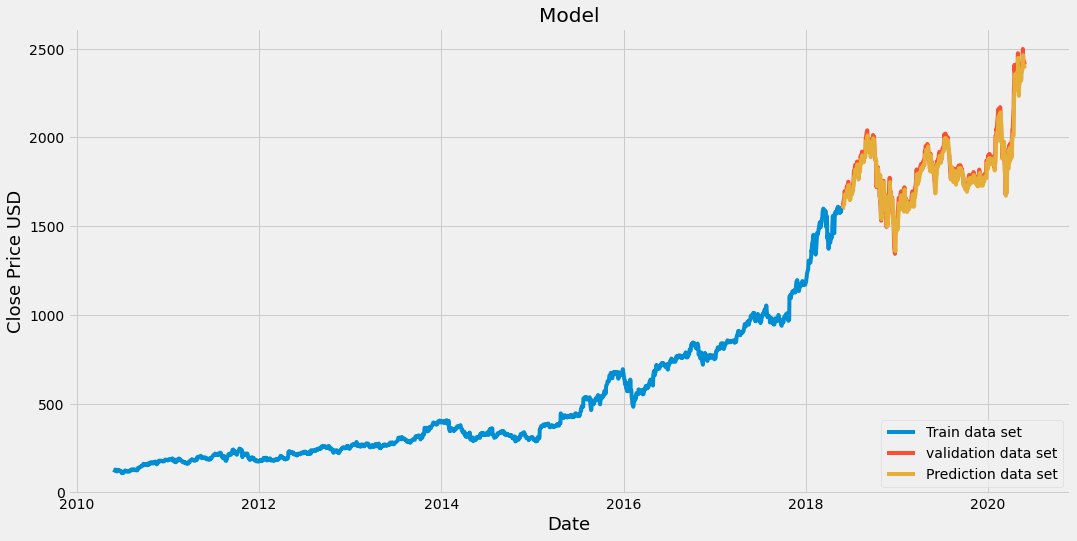

In [17]:
#Plot data
train = amznclose[:training_amzn_data]
valid = amznclose[training_amzn_data:]
valid['Predictions'] = amznpredictions
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train data set', 'validation data set','Prediction data set'],loc ='lower right' )
plt.show()

In [18]:
#show the validation price and predicted price
valid

,Close,Predictions
Date,,
2018-05-29,1612.869995,1596.377319
2018-05-30,1624.890015,1598.096191
2018-05-31,1629.619995,1610.294312
2018-06-01,1641.540039,1613.783813
2018-06-04,1665.270020,1625.711426
...,...,...
2020-05-20,2497.939941,2415.848389
2020-05-21,2446.739990,2463.082275
2020-05-22,2436.879883,2400.801025


In [19]:
#Predict future price
amzn_quote = web.DataReader('AMZN', data_source='yahoo', start='2015-05-27', end='2020-07-01')
#Create new dataframe
new_df = amzn_quote.filter(['Close'])
#Extract last 360 days closing price and convert df to array
last_360_days = new_df[-360:].values
#scalre the data to be valued between 0 and 1
last_360_days_scaled = scaler.transform(last_360_days)
#create an empty list
X_test = []
#Append past 360 days to empty list
X_test.append(last_360_days_scaled)
#Convert the X_test dataset to a numpy array
X_test = np.array(X_test)
#Reshape data
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[2837.9597]]


In [20]:
amzn_quote2 = web.DataReader('AMZN', data_source='yahoo', start='2015-05-27', end='2020-07-02')
print(amzn_quote2['Close'])


Date
2015-05-27     431.420013
2015-05-28     426.570007
2015-05-29     429.230011
2015-06-01     430.920013
2015-06-02     430.989990
                 ...     
2020-06-26    2692.870117
2020-06-29    2680.379883
2020-06-30    2758.820068
2020-07-01    2878.699951
2020-07-02    2890.300049
Name: Close, Length: 1286, dtype: float64
